# Applied Economic Analysis: Python Assignment
> ## Name: Yuche Lin, ANR:u921946, SNR:2026660 <a id='top'></a>

- ### The effect of China-United States trade war on unemployment rate, GDP, and stock index
![The effect of China–United States trade war](https://storage.googleapis.com/cw-com-tw/article/201806/article-5b35fff90764f.jpg)
> The China–United States trade war had lasted for nearly 1 year, during this period, the economy has been harshly impacted.

## Questions:
1. How did the trade war influence the [stock market index](#in)?
2. How did the trade war influence [GDP](#GDP) and [the unemployment rate](#un)?
3. As US and China agree to temporary truce, how did the stock market index perform afterwards?

## Motivation:
The trade war between two biggest economy is a great issue in 2018. It seems like China, the fast growing developing country, had been harmed serverely. And now the trade war has halted, I wonder will this benefit China, the previous victim, which considered in the inferior condition, or still remain China in the inferior state.

## Method:
1. Start from importing the data, and showing some graphical as well as numerical exploratory data analysis.
2. By comparing the stock market performence, GDP and employment before and after the event (the threshold), and applying the autoregression, we may have a glance about the effect of the event.
3. For more thorough analysis, applying the analysis with other developing countries, like India, Brazil..., we may have more complete picture about the effect of the trade war.
4. Although the trade war has halted just recently, I am still interesting in the future of China. I will naively try to estimate the future trend of China by the analysis result above and regressions.

## Answer:
1. According to the [stock market index](#in), it seems like trade war have no siginificant effect on the stock market. In fact, the effect of the sudden shock in 2018 Janurary 27 had a negative effect on SSE, China's stock market index. Although there is a pivot turn up after US and China engage in 3-day trade talks in Beijing, but the evidence aren't that clear yet.
2. According to the [GDP](#GDP) and [the unemployment rate](#un), it seems like trade war have no siginificant effect on the unemployment rate. However, we could still track the GDP, export and import in the future for both US and China.
3. According to the [regression result](#stock), the coefficient of AR(1) in both SSE and S&P500 are low. But I have difficulty finding the resource of running a threshold model, plus, the result of regression isn't that satisfied. I would say the regression result in this assignment is bad.

## Assumptions and limitations:
The data used in this assignment is based on [Yahoo Finance](https://finance.yahoo.com/), [Trading Economics](https://tradingeconomics.com/) and [World Bank data](https://data.worldbank.org/).
I selected several countries, China and United States are the main role, and also the other BRICs countries(Brazil, Russia, India)(because as assumption, I consider those countries a great comparations with China), and EU area. The index I applied are GDP, unemployment rate and stock market index.

The first order autoregressive model: AR (1)
* yt = β0 + β1yt−1 + t
* Assumption 1:
* E(t|yt−1, yt−2, . . .) = 0
* Two implications of this assumption:
* the best forecast for yt depends on only the most recent value yt−1
* the errors t are serially uncorrelated

The assumptions of unit roots and stationary series are also taking into account

Threshold models:
* yt =(β1 x0t + ut qt ≤ γ)
* (β2 x0t + ut qt > γ)
* xt is p × 1, qt is the threshold variable
* γ is an unknown threshold, to be estimated along with parameters β1, β2
* here xt, qt are exogenous variables, i.e. E(t|qt, xt) = 0
* xt, qt can contain lags; in that case, the model has to be stationary in each regime
* qt is a typical indicator of the business cycle

## Importing Libraries and Data:

In [1]:
## Importing libraries and data
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from pandas import Timestamp
import seaborn as sns
import fix_yahoo_finance as yf
import datetime
import pandas_datareader as pdr
import wbdata
from pandas_datareader import data, wb
from pandas_datareader.data import DataReader 
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_file, show, output_notebook
from bokeh.models import HoverTool
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
from matplotlib import rcParams, rcParamsDefault

# Make the plot's size nicer
rcParams['figure.figsize'] = (20,8)

## Timeline:
Reference
[The US-China Trade War: A Timeline](https://www.china-briefing.com/news/the-us-china-trade-war-a-timeline/)
[【貿易戰議題】](https://www.macromicro.me/blog/zong-jing-Spotlight-chuan-pu-kai-qiang-yi-wen-kan-dong-mao-yi-zhan-guan-jian-zhong-dian)

|Year|Date|Event|
-|-|-
|2017|Apr.01|Annouced "Special 301 Report", set China as PWL(Priority Watch List)|
||Nov.11|An inspection in China's Aluminum Plate by USTR|
|2018|Mar.01|Trump announced to impose 25% tariff on future China's steel, 10% tariff on aluminum, based on "Section 232 Investigations"|
||May.03|US-China engage in trade talks in Beijing, where the US demands that China reduce the trade gap two years. Talks end with no resolution|
||May.29|US reinstates tariff plans after brief truce|
||May.31|US had confrimed to impose tariff on EU, Canada and Mexico|
||Jun.15|US revises its tariff list|
||Jun.16|China revises its initial tariff list|
|-|-|-----------------------------------------------------------------------------The trade war started-----------------------------------------------------------------------------|
||Jul.06|US implements first China-specific tariffs|
||Jul.10|US releases second tariff list|
||Aug.02|US tariffs revisions|
||Aug.03|China announces second round of tariffs on US products|
||Aug.23|US and China implement second round of tariffs|
||Sep.18|US finalizes tariffs on US$200 billion of Chinese goods, Chian announces retaliation for US tariffs|
||Sep.24|US and China implement third round of tariffs|
||Nov.09|US and China resume trade talks|
||Dec.02|US and China agree to temporary truce|
|2019|Jan.01|US and China engage in 3-day trade talks in Beijing|

## Stock market index <a id="in"></a>
According to the timeline, I set 2018 Jul.06 as the beginning of the trade war. Now we will inspect into the influence on stock market index. I selected [US, S&P500](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC), [China, SSE Composite Index](https://finance.yahoo.com/quote/000001.ss/) as stock market index for US and China.

In [2]:
# I collected the data from Yahoo finance by datareader 
start = datetime(2016, 1, 1)
end = datetime(2019, 1, 30)
stocks = ['^GSPC', '000001.SS']
data_source = 'yahoo'
stock_data = DataReader(stocks, data_source, start, end)

index1 = pd.DataFrame(stock_data.Close)
index1.rename(columns={'^GSPC':'S&P500', '000001.SS':'SSE'}, inplace=True)

# Data inspection
print ("We have", index1.shape[0],'rows and',index1.shape[1],'columns in this DataFrame')
index1.head()

('We have', 799, 'rows and', 2, 'columns in this DataFrame')


Symbols,SSE,S&P500
Date,,
2016-01-04,3296.258057,2012.660034
2016-01-05,3287.710938,2016.709961
2016-01-06,3361.840088,1990.260010
2016-01-07,3125.001953,1943.089966
2016-01-08,3186.412109,1922.030029


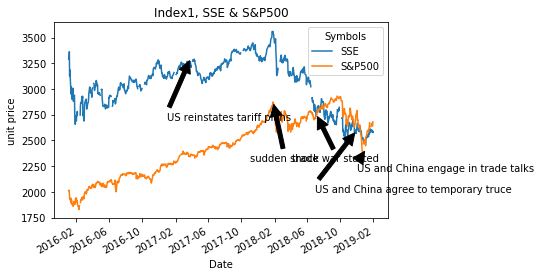

In [3]:
#I had plotted the data out, and markdown some points on the plot.
index1.plot()
plt.title('Index1, SSE & S&P500')
plt.ylabel('unit price')
plt.annotate('trade war started', xy=(datetime(2018,7,6), 2750), xytext=(datetime(2018,4,6), 2300),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('sudden shock', xy=(datetime(2018,1,27), 2875), xytext=(datetime(2017,11,1), 2300),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('US reinstates tariff plans', xy=(datetime(2017,3,29), 3300), xytext=(datetime(2017,1,1), 2700),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('US and China agree to temporary truce', xy=(datetime(2018,12,2), 2600), xytext=(datetime(2018,7,1), 2000),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('US and China engage in trade talks', xy=(datetime(2019,1,1), 2400), xytext=(datetime(2018,12,1), 2200),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

As we can see, China had been suffering after the sudden shock in 2018 Janurary 27, and had a change on pivot 2019 Janurary 01, which is the date US and China engage in 3-day trade talks in Beijing. 
On the other hand, it seems that the trade war had no significant effect on US stock market, but both China and US stock market plummet at 2018 December 02, which US and Chian agree to temporary truce, and had a turning point after US and China engage in trade talks in Beijing.

Interestingly, the SSE and S&P500 had a cross point when the trade war started.

Now we will inspect into the other area's stock market, which are [Brazil, Bovespa](https://finance.yahoo.com/quote/%5EBVSP/), [India, Sensex](https://finance.yahoo.com/quote/%5EBSESN?ltr=1), [Russia, MCX](https://finance.yahoo.com/quote/MOEX.ME?p=MOEX.ME&.tsrc=fin-srch-v1) and [EU, ESTX 50](https://finance.yahoo.com/quote/%5ESTOXX50E/).

In [4]:
# I collected the data from Yahoo finance by datareader 
start = datetime(2016, 1, 1)
end = datetime(2019, 1, 30)
stocks2 = ['^BSESN', '^BVSP', 'MOEX.ME', '^STOXX50E']
data_source = 'yahoo'
stock_data2 = DataReader(stocks2, data_source, start, end)

index2 = pd.DataFrame(stock_data2.Close)
#Because the difference of unit in each stock index are too large, so use the logarithmic
index2=np.log(index2)
index2.rename(columns={'^BSESN':'Sensex', '^BVSP':'Bovespa', 'MOEX.ME':'MCX', '^STOXX50E':'ESTX 50'}, inplace=True)

# Data inspection
print ("We have", index2.shape[0],'rows and',index2.shape[1],'columns in this DataFrame')
index2.head()

('We have', 800, 'rows and', 4, 'columns in this DataFrame')


Symbols,MCX,Sensex,Bovespa,ESTX 50
Date,,,,
2016-01-04,4.520157,10.151259,10.648776,8.059833
2016-01-05,4.546481,10.149579,10.655352,8.064010
2016-01-06,4.547965,10.142754,10.640005,8.051762
2016-01-07,NaN,10.120687,10.613861,8.034203
2016-01-08,NaN,10.124001,10.611819,8.017462


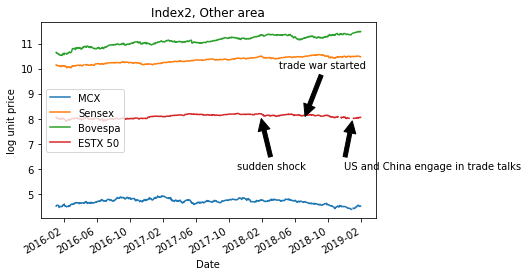

In [5]:
#I had plotted the data out, and markdown some points on the plot.
index2.plot()
plt.title('Index2, Other area')
plt.ylabel('log unit price')
plt.legend(loc=6)
plt.annotate('trade war started', xy=(datetime(2018,7,6), 8), xytext=(datetime(2018,4,6), 10),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('sudden shock', xy=(datetime(2018,1,27), 8.1), xytext=(datetime(2017,11,1), 6),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('US and China engage in trade talks', xy=(datetime(2019,1,1), 8), xytext=(datetime(2018,12,1), 6),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

Every stock market suffer a little from the sudden shock in 2018 Janurary 27, but the trade war had no siginificant effect.
However, EU, Russia and Brazil seems to have a turning point after US and China engage in trade talks, which is 2019 Janurary 01. Then, I will run the return rate of each stock market, and run the regression to find out whether trade war have siginificant effect on stock market.<a id="return"></a>

In [6]:
# I collected the data from Yahoo finance by datareader 
start = datetime(2016, 1, 1)
end = datetime(2019, 1, 30)
stocks = ['^GSPC', '000001.SS', '^BSESN', '^BVSP', 'MOEX.ME', '^STOXX50E']
data_source = 'yahoo'
stock_data = DataReader(stocks, data_source, start, end)

index = pd.DataFrame(stock_data.Close)
index = index.pct_change()
index.rename(columns={'^GSPC':'S&P500', '000001.SS':'SSE','^BSESN':'Sensex', '^BVSP':'Bovespa', 'MOEX.ME':'MCX', '^STOXX50E':'ESTX 50'}, inplace=True)

# Data inspection
print ("We have", index.shape[0],'rows and',index.shape[1],'columns in this DataFrame')
index.head()

('We have', 803, 'rows and', 6, 'columns in this DataFrame')


Symbols,SSE,MCX,Sensex,Bovespa,S&P500,ESTX 50
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.002593,0.026674,-0.001679,0.006597,0.002012,0.004187
2016-01-06,0.022547,0.001485,-0.006802,-0.015229,-0.013115,-0.012174
2016-01-07,-0.070449,NaN,-0.021825,-0.025806,-0.023700,-0.017405
2016-01-08,0.019651,NaN,0.003320,-0.002040,-0.010838,-0.016601


<a id='ds'></a>

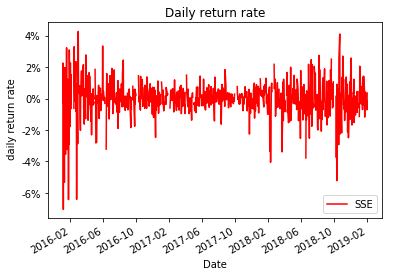

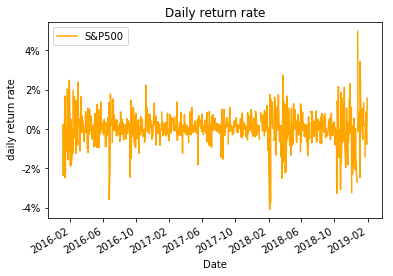

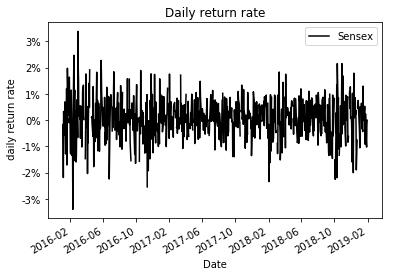

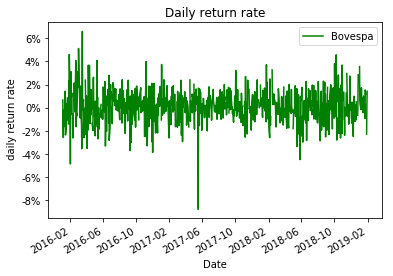

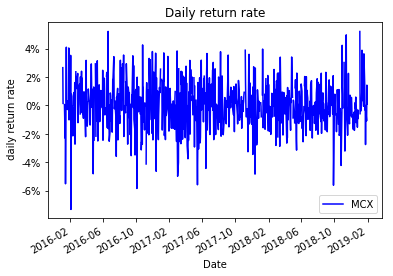

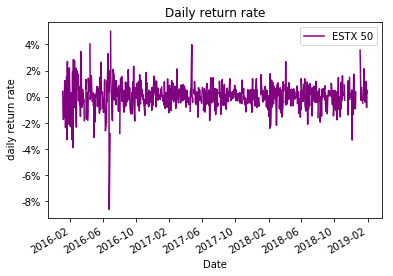

Symbols,SSE,MCX,Sensex,Bovespa,S&P500,ESTX 50
count,752.000000,771.000000,759.000000,762.000000,773.000000,755.000000
mean,-0.000261,0.000141,0.000463,0.001197,0.000405,0.000052
std,0.011117,0.016762,0.007720,0.014277,0.008295,0.010277
min,-0.070449,-0.073293,-0.033969,-0.087992,-0.040979,-0.086169
25%,-0.004811,-0.009056,-0.003825,-0.006720,-0.002310,-0.005147
50%,0.000527,-0.000400,0.000599,0.001160,0.000489,0.000333
75%,0.004721,0.010334,0.005160,0.009452,0.004287,0.005101
max,0.042629,0.052259,0.033795,0.065972,0.049594,0.049951


In [34]:
#I had plotted the data out, and markdown some points on the plot.
index['SSE'].plot(color='red').yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.title('Daily return rate')
plt.ylabel(' daily return rate')
plt.legend(loc=0)
plt.show()

index['S&P500'].plot(color='orange').yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.title('Daily return rate')
plt.ylabel(' daily return rate')
plt.legend(loc=0)
plt.show()

index['Sensex'].plot(color='black').yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.title('Daily return rate')
plt.ylabel(' daily return rate')
plt.legend(loc=0)
plt.show()

index['Bovespa'].plot(color='green').yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.title('Daily return rate')
plt.ylabel(' daily return rate')
plt.legend(loc=0)
plt.show()

index['MCX'].plot(color='blue').yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.title('Daily return rate')
plt.ylabel(' daily return rate')
plt.legend(loc=0)
plt.show()

index['ESTX 50'].plot(color='purple').yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.title('Daily return rate')
plt.ylabel(' daily return rate')
plt.legend(loc=0)
plt.show()

#Lets check the descriptive statistics of the daily returns of the stock markets
index.describe()

Only SSE got the negative daily return rate, but the sudden shock in 2018 Janurary 27 affected more.
The regression result is shown [below](#stock)

## GDP <a id="GDP"></a>

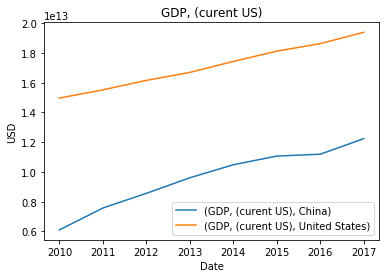

In [8]:
#set up the countries I want
countries = ["CN","US"]
 
#set up the indicator I want
indicators1 = {'NY.GDP.MKTP.CD':'GDP, (curent US)'}
 
#grab indicators above for countires above and load into data frame
dt =(datetime(2010,1,1), datetime(2019,1,1))
GDP = wbdata.get_dataframe(indicators1, country=countries , data_date=dt)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
GDP = GDP.unstack(level=0)
date_time = ["2010", "2011", "2012", "2013", "2014","2015", "2016", "2017", "2018"]
date_time = pd.to_datetime(date_time)
GDP = GDP.set_index(date_time)

# a simple matplotlib plot with legend, labels and a title
GDP.plot()
plt.legend(loc='best') 
plt.title("GDP, (curent US)")
plt.xlabel('Date')
plt.ylabel('USD')
plt.show()

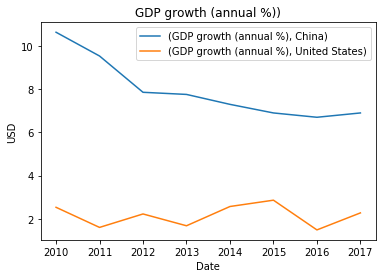

In [9]:
#set up the other indicator I want
indicators2 ={'NY.GDP.MKTP.KD.ZG': 'GDP growth (annual %)'}
 
#grab indicators above for countires above and load into data frame
GDPG = wbdata.get_dataframe(indicators2, country=countries , data_date=dt)

#df is "pivoted", pandas' unstack fucntion helps reshape it into something plottable
GDPG = GDPG.unstack(level=0)
date_time = ["2010", "2011", "2012", "2013", "2014","2015", "2016", "2017", "2018"]
date_time = pd.to_datetime(date_time)
GDPG = GDPG.set_index(date_time)

# a simple matplotlib plot with legend, labels and a title
GDPG.plot()
plt.legend(loc='best') 
plt.title("GDP growth (annual %))")
plt.xlabel('Date')
plt.ylabel('USD')
plt.show()

Since the trade war just occured recently, so I still got no information after the trade war started.
In the future, as long as the data has provided, we can not only inspect into the GDP change, but also the impact on export and import in both countries.

## The unemployment rate <a id="un"></a>

The unemployment rate is downloaded from [Trading Economics](https://tradingeconomics.com/), a database for economics data. I had collected the monthly unemployment rate from 2016-01 to 2018-12, for China and United States, and Russia, Brazil and European Union. The india data is missing because they have no
monthly data.

In [10]:
# Importing the data
df1 = pd.read_csv('unemployment rate.csv')

# Data inspection
df1.head(5)

,Time,Russia,United States,China,Brazil,Eu
0,2016-01-01,5.8,4.9,4.04,9.5,8.9
1,2016-02-01,5.8,4.9,4.04,10.2,8.9
2,2016-03-01,6.0,5.0,4.04,10.9,8.8
3,2016-04-01,5.9,5.0,4.05,11.2,8.7
4,2016-05-01,5.6,4.8,4.05,11.2,8.7


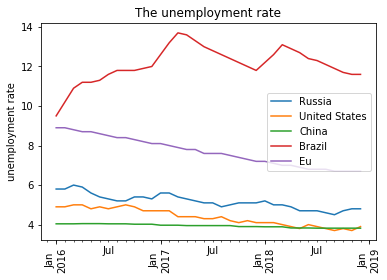

In [11]:
#Before ploting the data out, I have to set the date time, because the format in my CSV file isn't correct
date_time = ["2016-01-01", "2016-02-01", "2016-03-01", "2016-04-01", "2016-05-01", "2016-06-01", 
             "2016-07-01", "2016-08-01", "2016-09-01", "2016-10-01", "2016-11-01", "2016-12-01",
             "2017-01-01", "2017-02-01", "2017-03-01", "2017-04-01", "2017-05-01", "2017-06-01",
             "2017-07-01", "2017-08-01", "2017-09-01", "2017-10-01", "2017-11-01", "2017-12-01",
             "2018-01-01", "2018-02-01", "2018-03-01", "2018-04-01", "2018-05-01", "2018-06-01",
             "2018-07-01", "2018-08-01", "2018-09-01", "2018-10-01", "2018-11-01", "2018-12-01"]
date_time = pd.to_datetime(date_time)
df1 = df1.set_index(date_time)

#I had plotted the data out, and markdown some points on the plot.
df1.plot()
plt.title('The unemployment rate')
plt.ylabel('unemployment rate')
plt.xticks(rotation=90)
plt.show()

Now have a deeper inspcetion into US and China, and indicate those important point in the timeline.

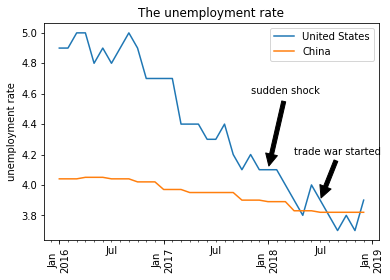

In [19]:
#Before ploting the data out, I have to set the date time, because the format in my CSV file isn't correct
date_time = ["2016-01-01", "2016-02-01", "2016-03-01", "2016-04-01", "2016-05-01", "2016-06-01", 
             "2016-07-01", "2016-08-01", "2016-09-01", "2016-10-01", "2016-11-01", "2016-12-01",
             "2017-01-01", "2017-02-01", "2017-03-01", "2017-04-01", "2017-05-01", "2017-06-01",
             "2017-07-01", "2017-08-01", "2017-09-01", "2017-10-01", "2017-11-01", "2017-12-01",
             "2018-01-01", "2018-02-01", "2018-03-01", "2018-04-01", "2018-05-01", "2018-06-01",
             "2018-07-01", "2018-08-01", "2018-09-01", "2018-10-01", "2018-11-01", "2018-12-01"]
date_time = pd.to_datetime(date_time)
df2=  df1.drop(columns=['Russia', 'Brazil', 'Eu'])
df2 = df2.set_index(date_time)

#I had plotted the data out, and markdown some points on the plot.
df2.plot()
plt.title('The unemployment rate')
plt.ylabel('unemployment rate')
plt.xticks(rotation=90)
plt.annotate('trade war started', xy=(datetime(2018,7,6), 3.9), xytext=(datetime(2018,4,6), 4.2),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate('sudden shock', xy=(datetime(2018,1,27), 4.1), xytext=(datetime(2017,11,1), 4.6),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.show()

It seems like the trade war didn't affect the unemployment rate siginificantly.

## The regression on [daily reurn of stock market](#return) <a id="stock"></a>

### ACF test and PACF test

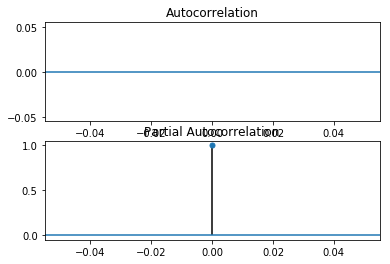

In [28]:
# Importing Libraries
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Define SSE daily return rate
start = datetime(2016, 1, 1)
end = datetime(2019, 1, 30)
stocks = [ '000001.SS', '^GSPC']
data_source = 'yahoo'
SSE = DataReader(stocks[0], data_source, start, end)
SSE = pd.DataFrame(SSE.Close)
SSE = SSE.pct_change()

#Running the ACF test and PACF test, but seems like the result isn't that satisfying
plt.figure()
plt.subplot(211)
plot_acf(SSE, ax=plt.gca())
plt.subplot(212)
plot_pacf(SSE, ax=plt.gca())
plt.show()

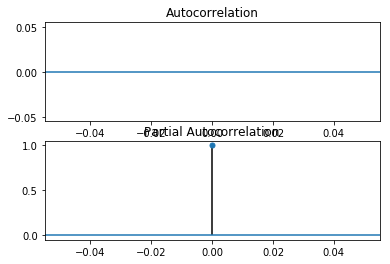

In [31]:
# Define S&P500 daily return rate
start = datetime(2016, 1, 1)
end = datetime(2019, 1, 30)
data_source = 'yahoo'
SP500 = DataReader(stocks[1], data_source, start, end)
SP500 = pd.DataFrame(SP500.Close)
SP500 = SP500.pct_change()

#Running the ACF test and PACF test, but seems like the result isn't that satisfying
plt.figure()
plt.subplot(211)
plot_acf(SSE, ax=plt.gca())
plt.subplot(212)
plot_pacf(SSE, ax=plt.gca())
plt.show()

The ACF test and the PACF test didn't give me a good result, but I will still do the ADF test to test whether the two time series are stationary or not. Additionally, I had test the two series by other software, and will apply AR(1) model as my regression result.

### ADF test


In [32]:
#Import libraries
from statsmodels.tsa.stattools import adfuller

#Run ADF test
X = SP500.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ValueError: too many values to unpack

But there are some unknown error in the test. However, by the evidence of [descriptive statistics](#ds) and [plot](#ds), I would said both daily return rate of SSE and S&P500 are stationary time series. Now lets run the AR(1) regression model.

### AR(1)

In [41]:
#Import Libraries
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

#Running AR(1)
X = SSE.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 20
Coefficients: [-6.25821099e-05 -3.36555096e-02  3.34823246e-03  4.81770693e-02
 -1.09596424e-01 -5.55157908e-02 -7.79178355e-02  3.51406307e-03
 -1.39473849e-02  5.26889605e-02 -2.53743730e-02  1.58488974e-02
 -4.28708709e-02 -1.78164502e-02 -1.16740680e-01  6.45094870e-02
 -7.50202547e-02 -8.99344086e-03 -2.50914604e-02  1.11266139e-03
  5.02151814e-02]


Running the SSE first prints the chosen optimal lag and the list of coefficients in the trained linear regression model.

We can see that a 20-lag model was chosen and trained. This is interesting given how close this lag is to the 2/3 of days in a month.

The 7 day forecast is then printed and the mean squared error of the forecast is summarized.

predicted=-0.001480, expected=0.000504
predicted=-0.002273, expected=0.004142
predicted=-0.002338, expected=0.003870
predicted=0.000069, expected=-0.001824
predicted=-0.001908, expected=-0.001049
predicted=0.001049, expected=-0.007200
predicted=-0.001108, expected=0.003493
Test MSE: 0.000


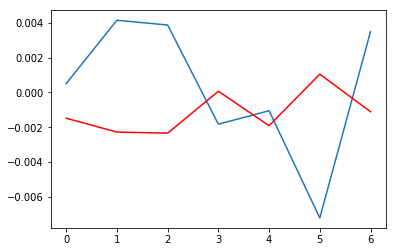

In [42]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

A plot of the expected (blue) vs the predicted values (red) is made.

Then lets run the AR(1) of S&P 500, then made the comparation.

In [43]:
#Running AR(1)
X = SP500.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 20
Coefficients: [ 0.0006336  -0.04244096 -0.01867851  0.06113353 -0.0367167  -0.06953567
  0.00492887  0.01809259 -0.08881608 -0.02576366  0.01276144  0.03680596
 -0.03721187 -0.05305046 -0.10583759 -0.01511386  0.02769656  0.06520301
  0.02725038 -0.05402838 -0.05291439]


predicted=0.005513, expected=-0.014157
predicted=0.003839, expected=0.002203
predicted=0.000665, expected=0.001376
predicted=-0.005781, expected=0.008489
predicted=-0.003278, expected=-0.007847
predicted=-0.002486, expected=-0.001456
predicted=0.000059, expected=0.015549
Test MSE: 0.000


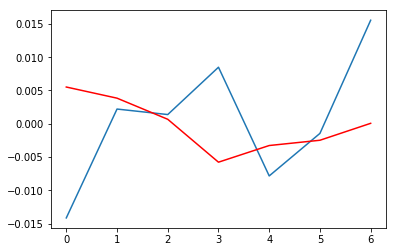

In [44]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

As we can see, the coefficient of both SSE and SP500 are low.
I will hope to run a threshold model for both SSE and SP500, but I have difficulty finding the resource online.

Back to [top](#top)